Importa o modelo a ser fatiado e mapeado

In [2]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/Lingote9025.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -7.752, model zmax = 15, first plane Z = -9.748, number of planes = 14
-Incremental, Lingote9025.stl, thickness = 2, #T = 432, #P = 12, #S = 384, 5.1e-05s (slicing), 0.000198s (polygon assembling), 0.002572s (total), *K: 0.888889


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 0.6319231986999512
salvando as camadas
Total de [salvando as camadas] : 0.1330718994140625
Total de [Fase 0: ] : 0.7659859657287598


Paredes Finas

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
configuracoes = files.Config("solda_config.yaml")
[d_tw, sob_tw_per, name_prog] = gui.ask_parameters_thin_walls(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_tw, sob_tw_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 0.5771307945251465
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0022983551025390625
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.008894920349121094
Total de [Fase 1: Camada: 0] : 0.5935459136962891
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 0.5213513374328613
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0003972053527832031
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.006664276123046875
Total de [Fase 1: Camada: 1] : 0.5318167209625244
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 0.5302736759185791
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0009057521820068359
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.008667230606079102
Total de [Fase 1: Camada: 2] : 0.

Contornos

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[void_max,external_max,internal_max,d_cont,sob_cont_per,name_prog] = gui.ask_parameters_offsets(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max, d_cont, sob_cont_per, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Value(False)
Value(False)
Criando Lvls


Pontes

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[n_max, d_bridg, sob_bridg_per, name_prog] = gui.ask_parameters_bridges(configuracoes)
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_bridg, sob_bridg_per, len(camadas), sum_prohibited_areas, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.021963834762573242
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 1.0602762699127197
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.0019693374633789062
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.0038068294525146484
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 8.58306884765625e-06
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.03179192543029785
Total de [Fase 3: Camada: 0] : 1.1363122463226318
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.026657581329345703
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 1.4294731616973877
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.00116944313049

Zigzags

In [6]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[d_larg, sob_larg_per, name_prog] = gui.ask_parameters_zigzags(configuracoes)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders, d_larg, sob_larg_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.38500094413757324
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.005759477615356445
Total de [Fase 4: Camada: 0] : 0.42078232765197754
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.6133511066436768
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.006197452545166016
Total de [Fase 4: Camada: 1] : 0.640192985534668
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.34999895095825195
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.005906820297241211
Total de [Fase 4: Camada: 2] : 0.3785665035247803
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.6122639179229736
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.0060918331146240234
Total de [Fase 4: Camada: 3] : 0.641506

IMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.09293198585510254
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.05359625816345215
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.04951620101928711
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.05405783653259277
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.051595211029052734
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.05585765838623047
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.05290675163269043
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.052022457122802734


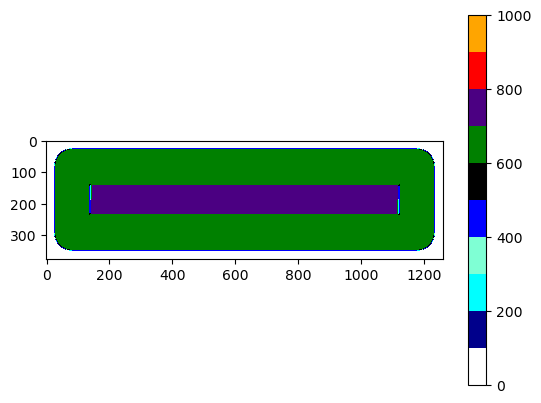

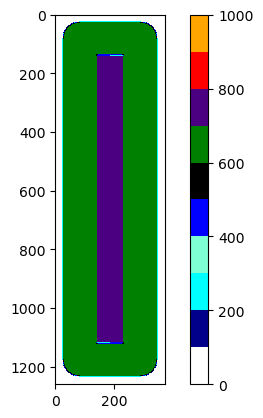

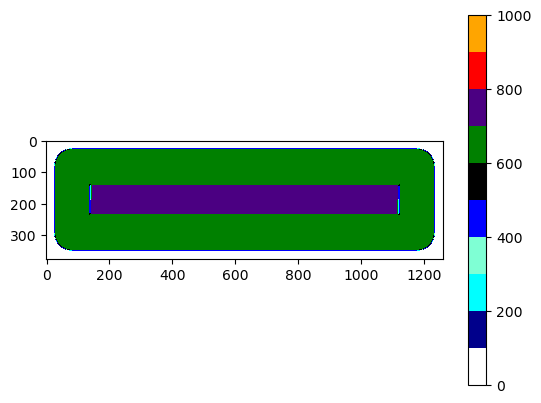

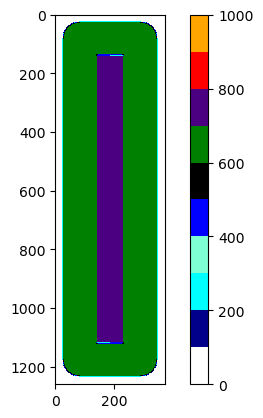

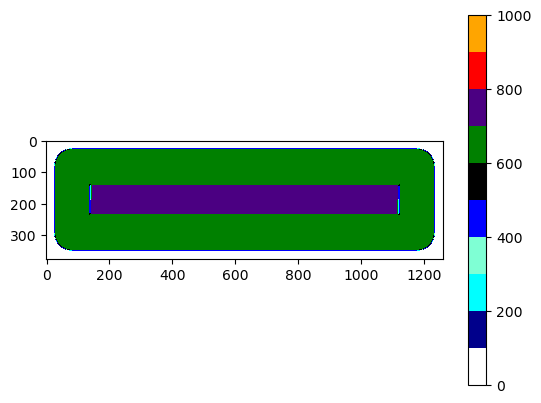

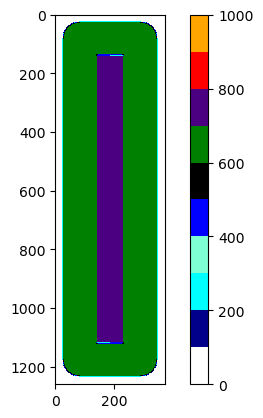

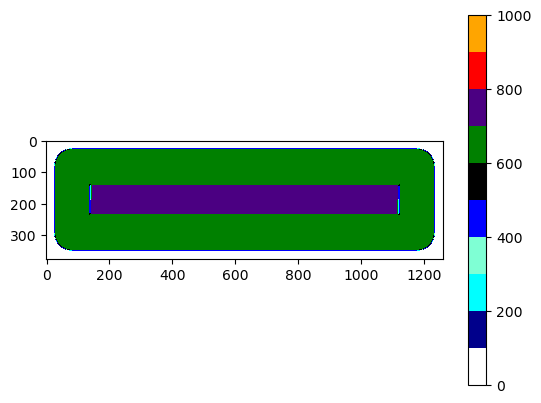

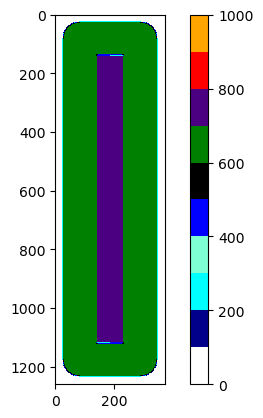

In [7]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.00662684440612793
Total de [Making offset routes] : 0.26529836654663086
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.007189035415649414
Total de [Making offset routes] : 0.2742781639099121
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.006787538528442383
Total de [Making offset routes] : 0.38874340057373047
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0070323944091796875
Total de [Making offset routes] : 0.265094518661499
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.006789445877075195
Total de [Making offset routes] : 0.24285149574279785
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.007218599319458008
Total de [Making offset routes] : 0.2927989959716797
Making offset routes
salva

Rotas de pontes

In [9]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00018787384033203125
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 0.7562103271484375
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 0.00014448165893554688
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.012349367141723633
Total de [Camada: L_000] : 0.8093695640563965
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00010180473327636719
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 0.8621387481689453
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 0.00021982192993164062
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.011813640594482422
Total de [Camada: L_001] : 0.903249979019165
Camada: L_002
Making Offset bridges routes
Total de [Making Offset bridges routes] : 8.225440979003906e-05
Making Z

Rotas de Ziguezague

In [10]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.0003376007080078125
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.0019290447235107422
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0007734298706054688
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0005152225494384766
salvando grafos
Total de [salvando grafos] : 0.02158069610595703
Total de [Making zigzag routes] : 0.052663326263427734
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.00035262107849121094
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.001920938491821289
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0006706714630126953
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.000418186187

WEAVING

In [11]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.22156620025634766
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.021641254425048828
Total de [Fase 5 b] : 0.24350261688232422
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.21143031120300293
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.02119159698486328
Total de [Fase 5 b] : 0.2328329086303711
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.21870732307434082
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.020554780960083008
Total de [Fase 5 b] : 0.23947978019714355
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.2165660858154297
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.020087003707

Rotas de Thin Walls

In [12]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.009813070297241211
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.0531158447265625e-06
Total de [Making thin walls routes] : 0.009972572326660156
Total de [Fase 5] : 0.010047435760498047
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.007146358489990234
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.5762786865234375e-06
Total de [Making thin walls routes] : 0.007271289825439453
Total de [Fase 5] : 0.0072786808013916016
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.008872747421264648
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.814697265625e-06
Total de [Making thin walls routes] : 0.009021759033203125
Total de [Fase 5] : 0.009029150009155273
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.007010221481323242
salvando imagens das rotas
Total 

Encontrando o lugar onde será o começo da trilha de cada ilha

In [13]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0011265277862548828
Total de [Encontrando ponto de união ext-int] : 0.3353588581085205
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0015192031860351562
Total de [Encontrando ponto de união ext-int] : 0.511451005935669
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001125335693359375
Total de [Encontrando ponto de união ext-int] : 0.3374969959259033
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0012233257293701172
Total de [Encontrando ponto de união ext-int] : 0.5116705894470215
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0013012886047363281
Total de [Enco

Unificando rotas EXTERNAS nas camadas

In [14]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 6: layer_{c.name}"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6: layer_L_000
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.010891199111938477
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.011757612228393555
Total de [Conectando rotas externas] : 0.06797146797180176
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02920365333557129
Total de [Fase 6: layer_L_000] : 0.09743809700012207
Fase 6: layer_L_001
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.011234760284423828
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.012645244598388672
Total de [Conectando rotas externas] : 0.06564021110534668
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.028566837310791016
Total de [Fase 6: layer_L_001] : 0.09439253807067871
Fase 6: layer_L_002
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.010863304138183594
C

Unificando rotas INTERNAS nas camadas

In [15]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 7: Layer_{c.name}"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7: Layer_L_000
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.07085609436035156
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0009865760803222656
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02668142318725586
Total de [Fase 7: Layer_L_000] : 0.15078043937683105
Fase 7: Layer_L_001
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.061824798583984375
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0006947517395019531
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.026066064834594727
Total de [Fase 7: Layer_L_001] : 0.13536858558654785
Fase 7: Layer_L_002
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.17412781715393066
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.00048160552978515625
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.022770166397094727
Total de [Fase 7: Layer_L_002] : 0.

Unindo rotas de thin walls

In [16]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 8: Layer_{c.name}"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8: Layer_L_000
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004677772521972656
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.019267559051513672
Total de [Fase 8: Layer_L_000] : 0.029559612274169922
Fase 8: Layer_L_001
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00035881996154785156
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.019337177276611328
Total de [Fase 8: Layer_L_001] : 0.02826714515686035
Fase 8: Layer_L_002
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004138946533203125
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.019910812377929688
Total de [Fase 8: Layer_L_002] : 0.029021501541137695
Fase 8: Layer_L_003
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0005190372467041016
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.019384384155273438
Total de [Fase 8: Layer_L_003] : 0.02765965461730957
Fase 

Unindo todas as rotas

In [17]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.00522613525390625
Conectando todas as partes
Total de [Conectando todas as partes] : 0.5866110324859619
salvando imagens das rotas
[[103, 162], [103, 606], [102, 607], [62, 607], [61, 606], [61, 82], [62, 81], [62, 76], [63, 75], [63, 74], [64, 73], [64, 72], [65, 71], [65, 70], [70, 65], [71, 65], [72, 64], [73, 64], [74, 63], [75, 63], [76, 62], [81, 62], [82, 61], [292, 61], [293, 62], [298, 62], [299, 63], [300, 63], [301, 64], [302, 64], [303, 65], [304, 65], [309, 70], [309, 71], [310, 72], [310, 73], [311, 74], [311, 75], [312, 76], [312, 81], [313, 82], [313, 1178], [312, 1179], [312, 1184], [311, 1185], [311, 1186], [310, 1187], [310, 1188], [309, 1189], [309, 1190], [304, 1195], [303, 1195], [302, 1196], [301, 1196], [300, 1197], [299, 1197], [298, 1198], [293, 1198], [292, 1199], [82, 1199], [81, 1198], [76, 1198], [75, 1197], [74, 1197], [73, 1196], [72, 1196], [71, 1195], [70, 1195], [65, 

Gerando o Código G

In [18]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_vazio, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()
configuracoes = files.Config("solda_config.yaml")

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [0+6+2.5+(i*2) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               configuracoes,
                               vel_vazio,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
trocou para 1
trocou para 2
Deslocamento total da camada 0 = 621.6598686025021mm
Tempo estimado com Vel=360.0mm/min = 1.7268329683402837min

trocou para 1
trocou para 2
Deslocamento total da camada 1 = 690.798682381535mm
Tempo estimado com Vel=360.0mm/min = 1.918885228837597min

trocou para 1
trocou para 2
Deslocamento total da camada 2 = 621.5110788473451mm
Tempo estimado com Vel=360.0mm/min = 1.7264196634648474min

trocou para 1
trocou para 2
Deslocamento total da camada 3 = 690.7964832475237mm
Tempo estimado com Vel=360.0mm/min = 1.9188791201320103min

trocou para 1
trocou para 2
Deslocamento total da camada 4 = 688.2354920188047mm
Tempo estimado com Vel=360.0mm/min = 1.9117652556077909min

trocou para 1
trocou para 2
Deslocamento total da camada 5 = 611.2461331948308mm
Tempo estimado com Vel=360.0mm/min = 1.6979059255411966min

trocou para 1
trocou para 2
Deslocamento total da camada 6 = 688.2354920188042mm
Tempo estimado com Vel=360.0mm/min = 1.9117652556077893min

Comprimento da trajetória

In [19]:
import os
import numpy as np
import math

with open("traj interna.txt") as f:
    lido = f.readlines()
    f.close()
lido = [x.strip("\n") for x in lido] 
lido = [x.split(", ") for x in lido] 
lido = lido[:-1]
lido = [[float(x[0]), float(x[1])] for x in lido]
modulos = [math.sqrt((x[0]**2)+(x[1]**2)) for x in lido]
comprimento = np.sum(modulos)
print(f'comprimento da trajetoria={comprimento}')

area_preench = 11 #mm² do imageJ
raio_toroide = 37.5 # mm medido
comp_traj = comprimento #mm do codigo G calculado acima
diam_fio = 1.2 #mm medido
area_fio = math.pi*((diam_fio/2)**2) #mm²
vol_preench = (2*math.pi*raio_toroide*area_preench)
Ws_Vd = vol_preench/(area_fio*comp_traj)
print(f'Relação de velocidades:{Ws_Vd}')

comprimento da trajetoria=107.39094342779873
Relação de velocidades:21.339477925411874


In [20]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [21]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [22]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [23]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [24]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)